In [5]:
import numpy as np
import cv2
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

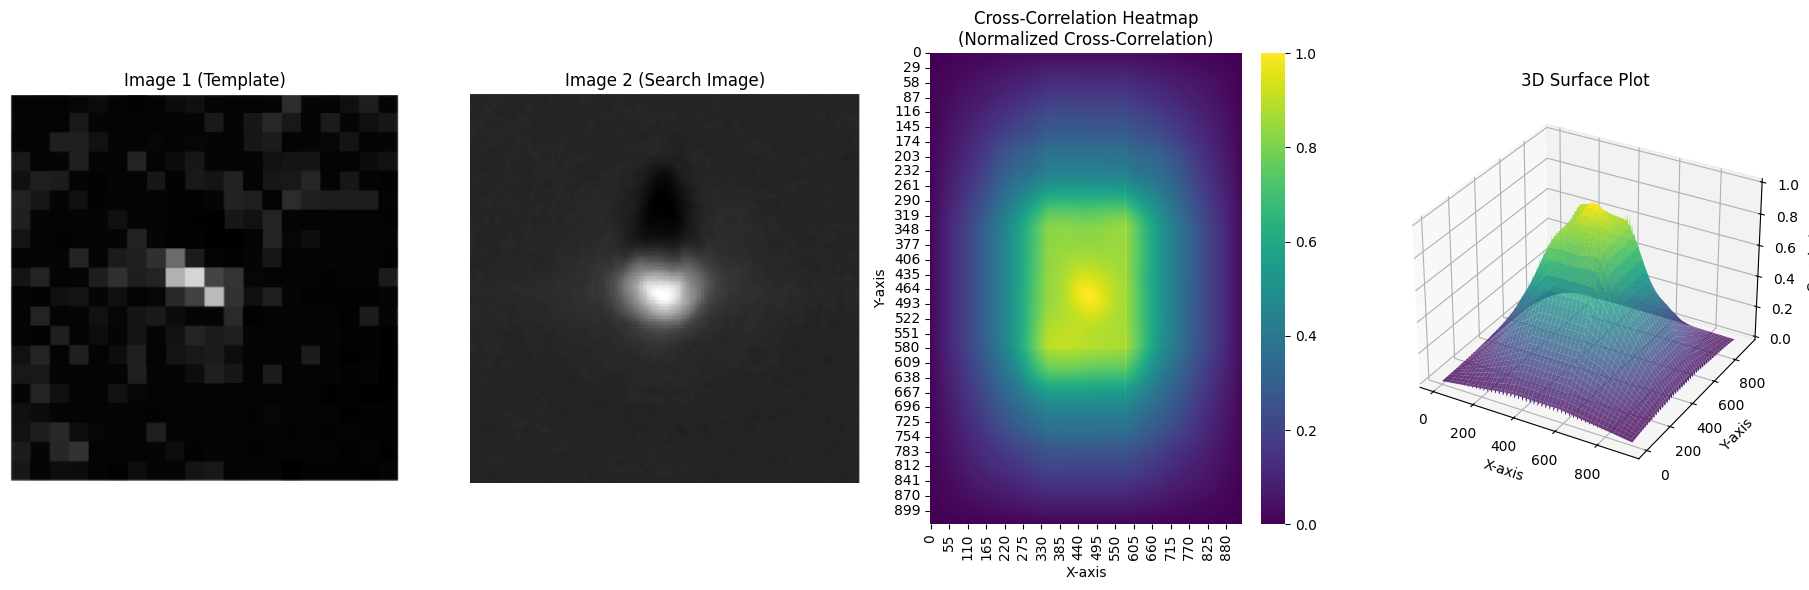

Peak correlation at: (x=469, y=475)


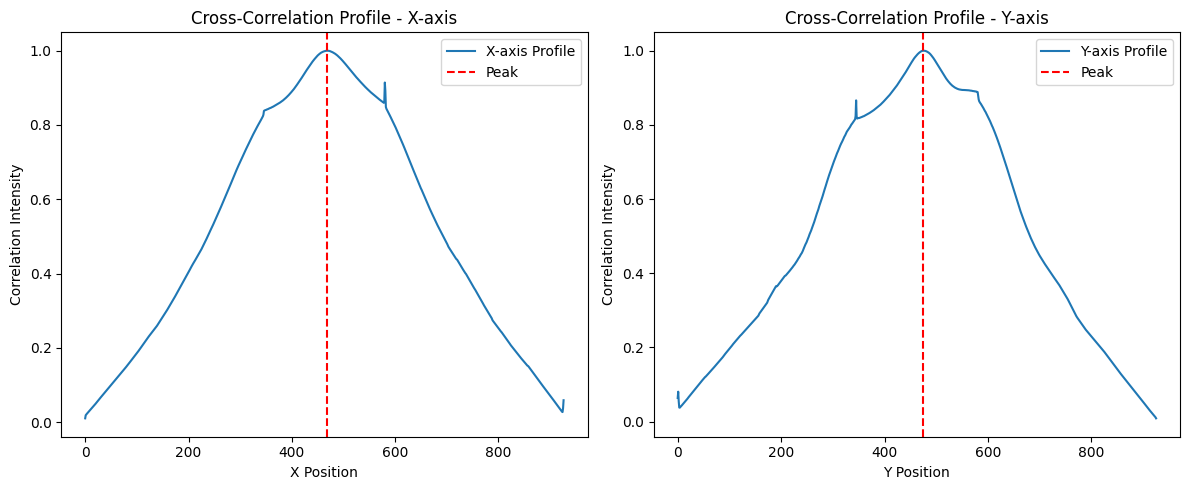

Peak correlation at: (x=469, y=475)


In [8]:
def load_grayscale_image(path):
    """
    Loads an image in grayscale mode.

    Args:
        path (str): Path to the image file.

    Returns:
        np.ndarray: Grayscale image.
    """
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path '{path}' could not be loaded.")
    return image

def cross_correlate_images(image1, image2, mode='full'):
    """
    Performs 2D cross-correlation between two images.

    Args:
        image1 (np.ndarray): First image (e.g., template).
        image2 (np.ndarray): Second image (e.g., search image).
        mode (str): Mode of cross-correlation. Options: 'full', 'valid', 'same'.

    Returns:
        np.ndarray: Cross-correlation result.
    """
    # Ensure the inputs are float for precision
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)
    
    # Perform cross-correlation
    correlation = correlate2d(image2, image1, mode=mode, boundary='fill', fillvalue=0)
    return correlation

def normalize_correlation(correlation):
    """
    Normalizes the cross-correlation map to the range [0, 1].

    Args:
        correlation (np.ndarray): Cross-correlation result.

    Returns:
        np.ndarray: Normalized cross-correlation map.
    """
    correlation -= np.min(correlation)
    correlation /= np.max(correlation)
    return correlation

def visualize_results(image1, image2, correlation, method='cross-correlation'):
    """
    Visualizes the original images and the cross-correlation result.

    Args:
        image1 (np.ndarray): First image.
        image2 (np.ndarray): Second image.
        correlation (np.ndarray): Cross-correlation result.
        method (str): Method name for the title.
    """
    plt.figure(figsize=(18, 6))

    # Display Template Image
    plt.subplot(1, 4, 1)
    plt.imshow(image1, cmap='gray')
    plt.title('Image 1 (Template)')
    plt.axis('off')

    # Display Search Image
    plt.subplot(1, 4, 2)
    plt.imshow(image2, cmap='gray')
    plt.title('Image 2 (Search Image)')
    plt.axis('off')

    # Display Cross-Correlation Heatmap using Seaborn
    plt.subplot(1, 4, 3)
    sns.heatmap(correlation, cmap='viridis')
    plt.title(f'Cross-Correlation Heatmap\n({method})')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Display 3D Surface Plot of Cross-Correlation
    ax = plt.subplot(1, 4, 4, projection='3d')
    X = np.arange(correlation.shape[1])
    Y = np.arange(correlation.shape[0])
    X, Y = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, correlation, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_title('3D Surface Plot')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Correlation')

    plt.tight_layout()
    plt.show()

def plot_correlation_profiles(correlation):
    """
    Plots intensity profiles along the x and y axes at the peak correlation.

    Args:
        correlation (np.ndarray): Normalized cross-correlation map.
    """
    # Find peak correlation
    peak_y, peak_x = np.unravel_index(np.argmax(correlation), correlation.shape)
    print(f"Peak correlation at: (x={peak_x}, y={peak_y})")

    # Extract profiles
    x_profile = correlation[peak_y, :]
    y_profile = correlation[:, peak_x]

    # Plot profiles
    plt.figure(figsize=(12, 5))

    # X-axis Profile
    plt.subplot(1, 2, 1)
    plt.plot(x_profile, label='X-axis Profile')
    plt.axvline(peak_x, color='r', linestyle='--', label='Peak')
    plt.title('Cross-Correlation Profile - X-axis')
    plt.xlabel('X Position')
    plt.ylabel('Correlation Intensity')
    plt.legend()

    # Y-axis Profile
    plt.subplot(1, 2, 2)
    plt.plot(y_profile, label='Y-axis Profile')
    plt.axvline(peak_y, color='r', linestyle='--', label='Peak')
    plt.title('Cross-Correlation Profile - Y-axis')
    plt.xlabel('Y Position')
    plt.ylabel('Correlation Intensity')
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    # Paths to your images
    image1_path = '/home/nathan/Pictures/CNNiMAGE.png'  # Template image
    image2_path = '/home/nathan/Pictures/KPCACORR.png'  # Search image

    # Load images
    image1 = load_grayscale_image(image1_path)
    image2 = load_grayscale_image(image2_path)

    # Perform cross-correlation
    correlation = cross_correlate_images(image1, image2, mode='full')

    # Normalize the correlation map
    correlation_normalized = normalize_correlation(correlation)

    # Visualize the results with heatmaps and 3D plots
    visualize_results(image1, image2, correlation_normalized, method='Normalized Cross-Correlation')

    # Plot cross-correlation profiles at the peak
    plot_correlation_profiles(correlation_normalized)

    # Find the peak correlation
    peak_y, peak_x = np.unravel_index(np.argmax(correlation_normalized), correlation_normalized.shape)
    print(f"Peak correlation at: (x={peak_x}, y={peak_y})")

if __name__ == "__main__":
    main()

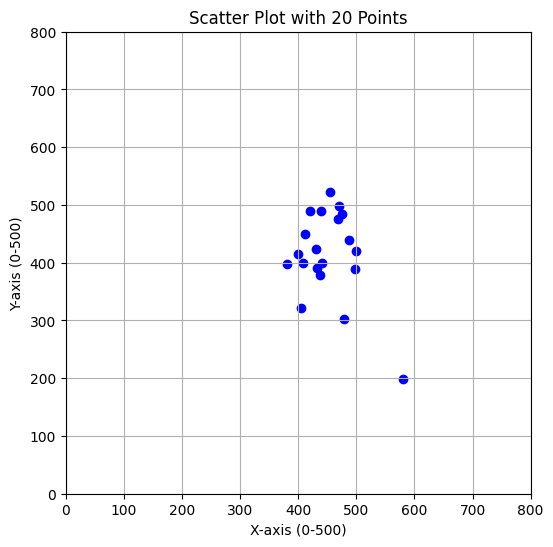

In [11]:
# Create a blank figure
plt.figure(figsize=(6, 6))

# Set axis limits
plt.xlim(0, 800)
plt.ylim(0, 800)

# Define your points here
# Replace these with your 20 points (x, y) coordinates
x_points = [469, 475, 479, 432, 455, 420, 470, 430, 400, 380, 405, 497, 411, 580, 488, 440, 500, 437, 441, 409]
y_points = [475, 485, 302, 390, 522, 490, 498, 423, 415, 397, 321, 389, 450, 198, 439, 489, 421, 378, 399, 400]

# Create the scatter plot
plt.scatter(x_points, y_points, color='blue')

# Add labels and title
plt.xlabel('X-axis (0-500)')
plt.ylabel('Y-axis (0-500)')
plt.title('Scatter Plot with 20 Points')

# Show the plot
plt.grid(True)
plt.show()

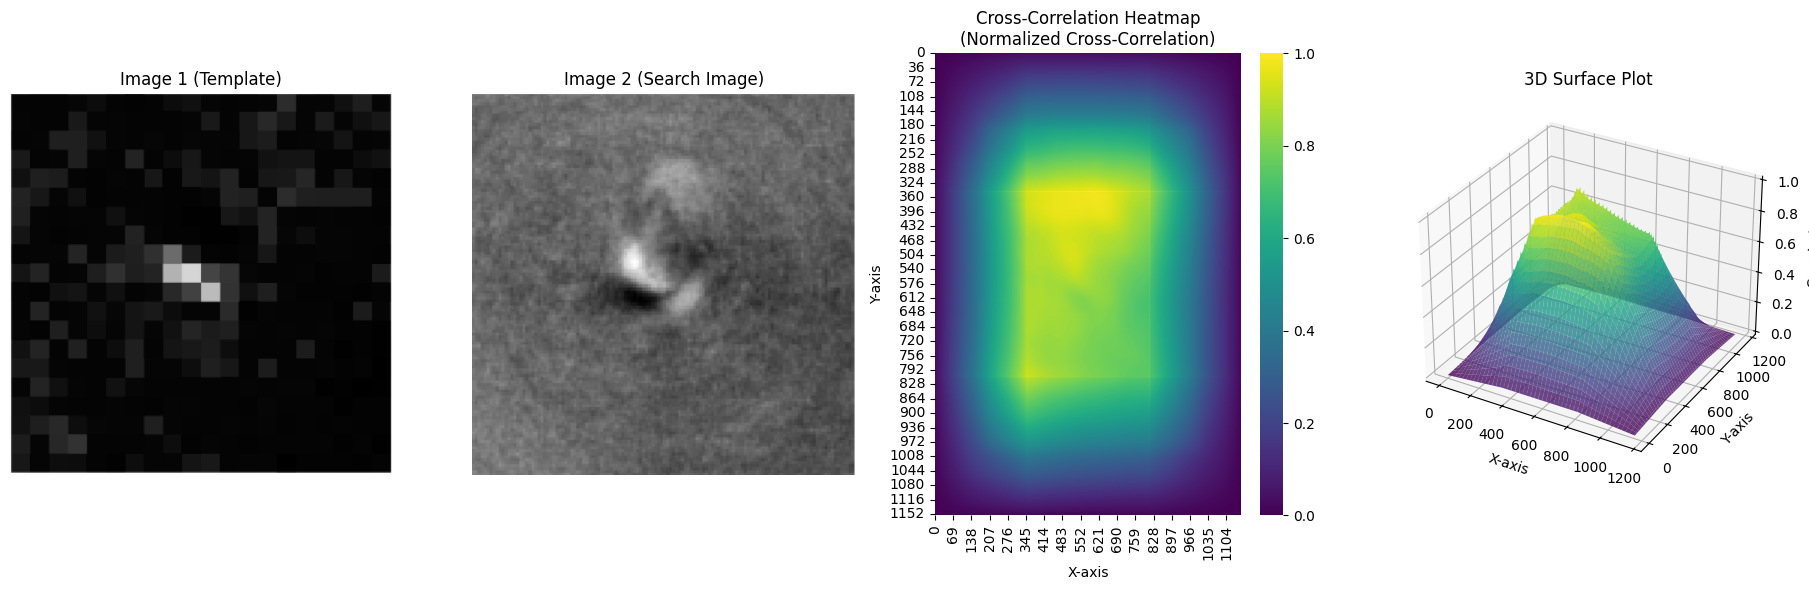

Peak correlation at: (x=606, y=345)


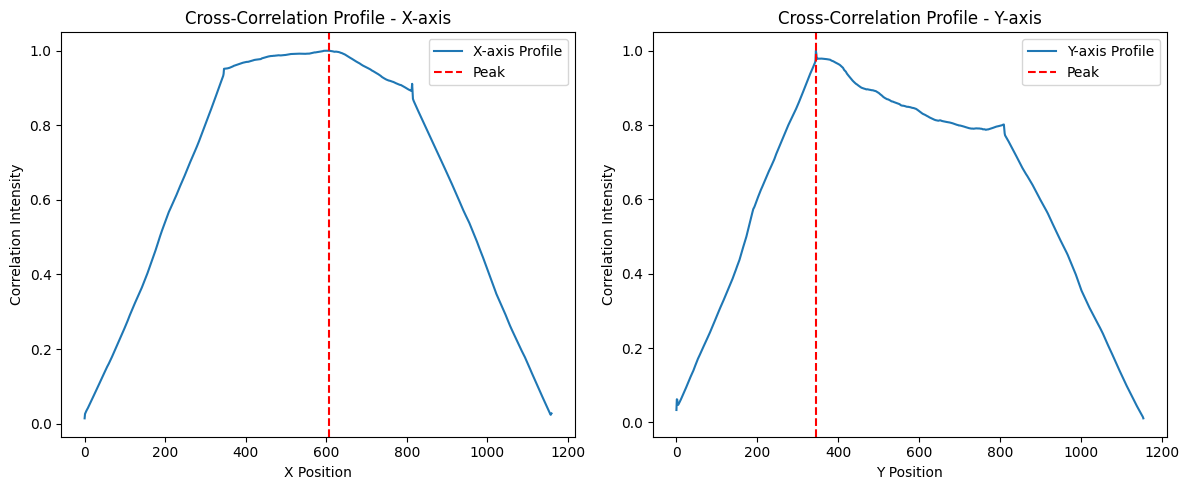

Peak correlation at: (x=606, y=345)


In [9]:
def load_grayscale_image(path):
    """
    Loads an image in grayscale mode.

    Args:
        path (str): Path to the image file.

    Returns:
        np.ndarray: Grayscale image.
    """
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path '{path}' could not be loaded.")
    return image

def cross_correlate_images(image1, image2, mode='full'):
    """
    Performs 2D cross-correlation between two images.

    Args:
        image1 (np.ndarray): First image (e.g., template).
        image2 (np.ndarray): Second image (e.g., search image).
        mode (str): Mode of cross-correlation. Options: 'full', 'valid', 'same'.

    Returns:
        np.ndarray: Cross-correlation result.
    """
    # Ensure the inputs are float for precision
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)
    
    # Perform cross-correlation
    correlation = correlate2d(image2, image1, mode=mode, boundary='fill', fillvalue=0)
    return correlation

def normalize_correlation(correlation):
    """
    Normalizes the cross-correlation map to the range [0, 1].

    Args:
        correlation (np.ndarray): Cross-correlation result.

    Returns:
        np.ndarray: Normalized cross-correlation map.
    """
    correlation -= np.min(correlation)
    correlation /= np.max(correlation)
    return correlation

def visualize_results(image1, image2, correlation, method='cross-correlation'):
    """
    Visualizes the original images and the cross-correlation result.

    Args:
        image1 (np.ndarray): First image.
        image2 (np.ndarray): Second image.
        correlation (np.ndarray): Cross-correlation result.
        method (str): Method name for the title.
    """
    plt.figure(figsize=(18, 6))

    # Display Template Image
    plt.subplot(1, 4, 1)
    plt.imshow(image1, cmap='gray')
    plt.title('Image 1 (Template)')
    plt.axis('off')

    # Display Search Image
    plt.subplot(1, 4, 2)
    plt.imshow(image2, cmap='gray')
    plt.title('Image 2 (Search Image)')
    plt.axis('off')

    # Display Cross-Correlation Heatmap using Seaborn
    plt.subplot(1, 4, 3)
    sns.heatmap(correlation, cmap='viridis')
    plt.title(f'Cross-Correlation Heatmap\n({method})')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Display 3D Surface Plot of Cross-Correlation
    ax = plt.subplot(1, 4, 4, projection='3d')
    X = np.arange(correlation.shape[1])
    Y = np.arange(correlation.shape[0])
    X, Y = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, correlation, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_title('3D Surface Plot')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Correlation')

    plt.tight_layout()
    plt.show()

def plot_correlation_profiles(correlation):
    """
    Plots intensity profiles along the x and y axes at the peak correlation.

    Args:
        correlation (np.ndarray): Normalized cross-correlation map.
    """
    # Find peak correlation
    peak_y, peak_x = np.unravel_index(np.argmax(correlation), correlation.shape)
    print(f"Peak correlation at: (x={peak_x}, y={peak_y})")

    # Extract profiles
    x_profile = correlation[peak_y, :]
    y_profile = correlation[:, peak_x]

    # Plot profiles
    plt.figure(figsize=(12, 5))

    # X-axis Profile
    plt.subplot(1, 2, 1)
    plt.plot(x_profile, label='X-axis Profile')
    plt.axvline(peak_x, color='r', linestyle='--', label='Peak')
    plt.title('Cross-Correlation Profile - X-axis')
    plt.xlabel('X Position')
    plt.ylabel('Correlation Intensity')
    plt.legend()

    # Y-axis Profile
    plt.subplot(1, 2, 2)
    plt.plot(y_profile, label='Y-axis Profile')
    plt.axvline(peak_y, color='r', linestyle='--', label='Peak')
    plt.title('Cross-Correlation Profile - Y-axis')
    plt.xlabel('Y Position')
    plt.ylabel('Correlation Intensity')
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    # Paths to your images
    image1_path = '/home/nathan/Pictures/CNNiMAGE.png'  # Template image
    image2_path = '/home/nathan/Pictures/PCAIMAGE.png'  # Search image

    # Load images
    image1 = load_grayscale_image(image1_path)
    image2 = load_grayscale_image(image2_path)

    # Perform cross-correlation
    correlation = cross_correlate_images(image1, image2, mode='full')

    # Normalize the correlation map
    correlation_normalized = normalize_correlation(correlation)

    # Visualize the results with heatmaps and 3D plots
    visualize_results(image1, image2, correlation_normalized, method='Normalized Cross-Correlation')

    # Plot cross-correlation profiles at the peak
    plot_correlation_profiles(correlation_normalized)

    # Find the peak correlation
    peak_y, peak_x = np.unravel_index(np.argmax(correlation_normalized), correlation_normalized.shape)
    print(f"Peak correlation at: (x={peak_x}, y={peak_y})")

if __name__ == "__main__":
    main()